<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/APID_eta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [76]:
def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [77]:
def grad_func_x1(x1):
  return 0.2*x1

In [78]:
def grad_func_x2(x2):
  return 4*x2

In [79]:
def Adaptive_PID_Ada(lr = 0.05, Kd = 0.9):
  x1, x2 = -10, -10  #parametrs
  log = []  #list to store the value of x1 and x2 i.e learning process

  gamma =0.9 # momentum parameter
  eps = 1e-8

  x1_prev,x2_prev = x1, x2
  grad_x1, grad_x2 = 0,0
  mt_x1, dt_x1, mt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_mt_x1, prev_mt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  vt_x1, vt_x2, prev_vt_x1, prev_vt_x2 = 0,0,0,0  #Introducing for accumulating the magnitude of the gradient

  t = 0

  while(1):    #Until Convergence
    t +=1

    grad_x1 = grad_func_x1(x1)
    grad_x2 = grad_func_x2(x2)

    vt_x1 = prev_vt_x1 + grad_x1**2  #Accumulating the magnitude of the gradient w.r.t first parameters
    mt_x1 = gamma*prev_mt_x1 + (lr*grad_x1)/math.sqrt(vt_x1 + eps)
    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(grad_x1 - prev_grad_x1)

    prev_grad_x1 = grad_x1
    prev_vt_x1 = vt_x1
    prev_mt_x1 = mt_x1
    prev_dt_x1 = dt_x1

    
    vt_x2 = prev_vt_x2 + grad_x2**2  #Accumulating the magnitude of the gradient w.r.t second parameters
    mt_x2 = gamma*prev_mt_x2 + (lr*grad_x2)/math.sqrt(vt_x2 + eps)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(grad_x2 - prev_grad_x2)

    prev_grad_x2 = grad_x2
    prev_vt_x2 = vt_x2
    prev_mt_x2 = mt_x2
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - mt_x1 - Kd*dt_x1
    x2 = x2 - mt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log,t

In [80]:
x1 = np.linspace(-10.0, 10.0, 100)
x2 = np.linspace(-10.0, 10.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = costs1 = np.array([func(X1, X2) for X1, X2 in zip(X1, X2)])

In [81]:
%%time
x1, x2, log1,t = Adaptive_PID_Ada(lr=2, Kd=4) #Kd = 4


CPU times: user 16.1 ms, sys: 4 µs, total: 16.1 ms
Wall time: 16.2 ms


In [82]:
t

9825

In [83]:
%%time
x1, x2, log2,t = Adaptive_PID_Ada(lr=1, Kd=4) #Kd = 3


CPU times: user 30.7 ms, sys: 40 µs, total: 30.7 ms
Wall time: 33 ms


In [84]:
t

18147

In [85]:
%%time
x1, x2, log3,t = Adaptive_PID_Ada(lr=0.5, Kd=4) 


CPU times: user 65.2 ms, sys: 5.91 ms, total: 71.1 ms
Wall time: 72.2 ms


In [86]:
t

35365

In [87]:
%%time
x1, x2, log4,t = Adaptive_PID_Ada(lr=0.1, Kd=4) 


CPU times: user 325 ms, sys: 9.95 ms, total: 335 ms
Wall time: 337 ms


In [88]:
t

185937

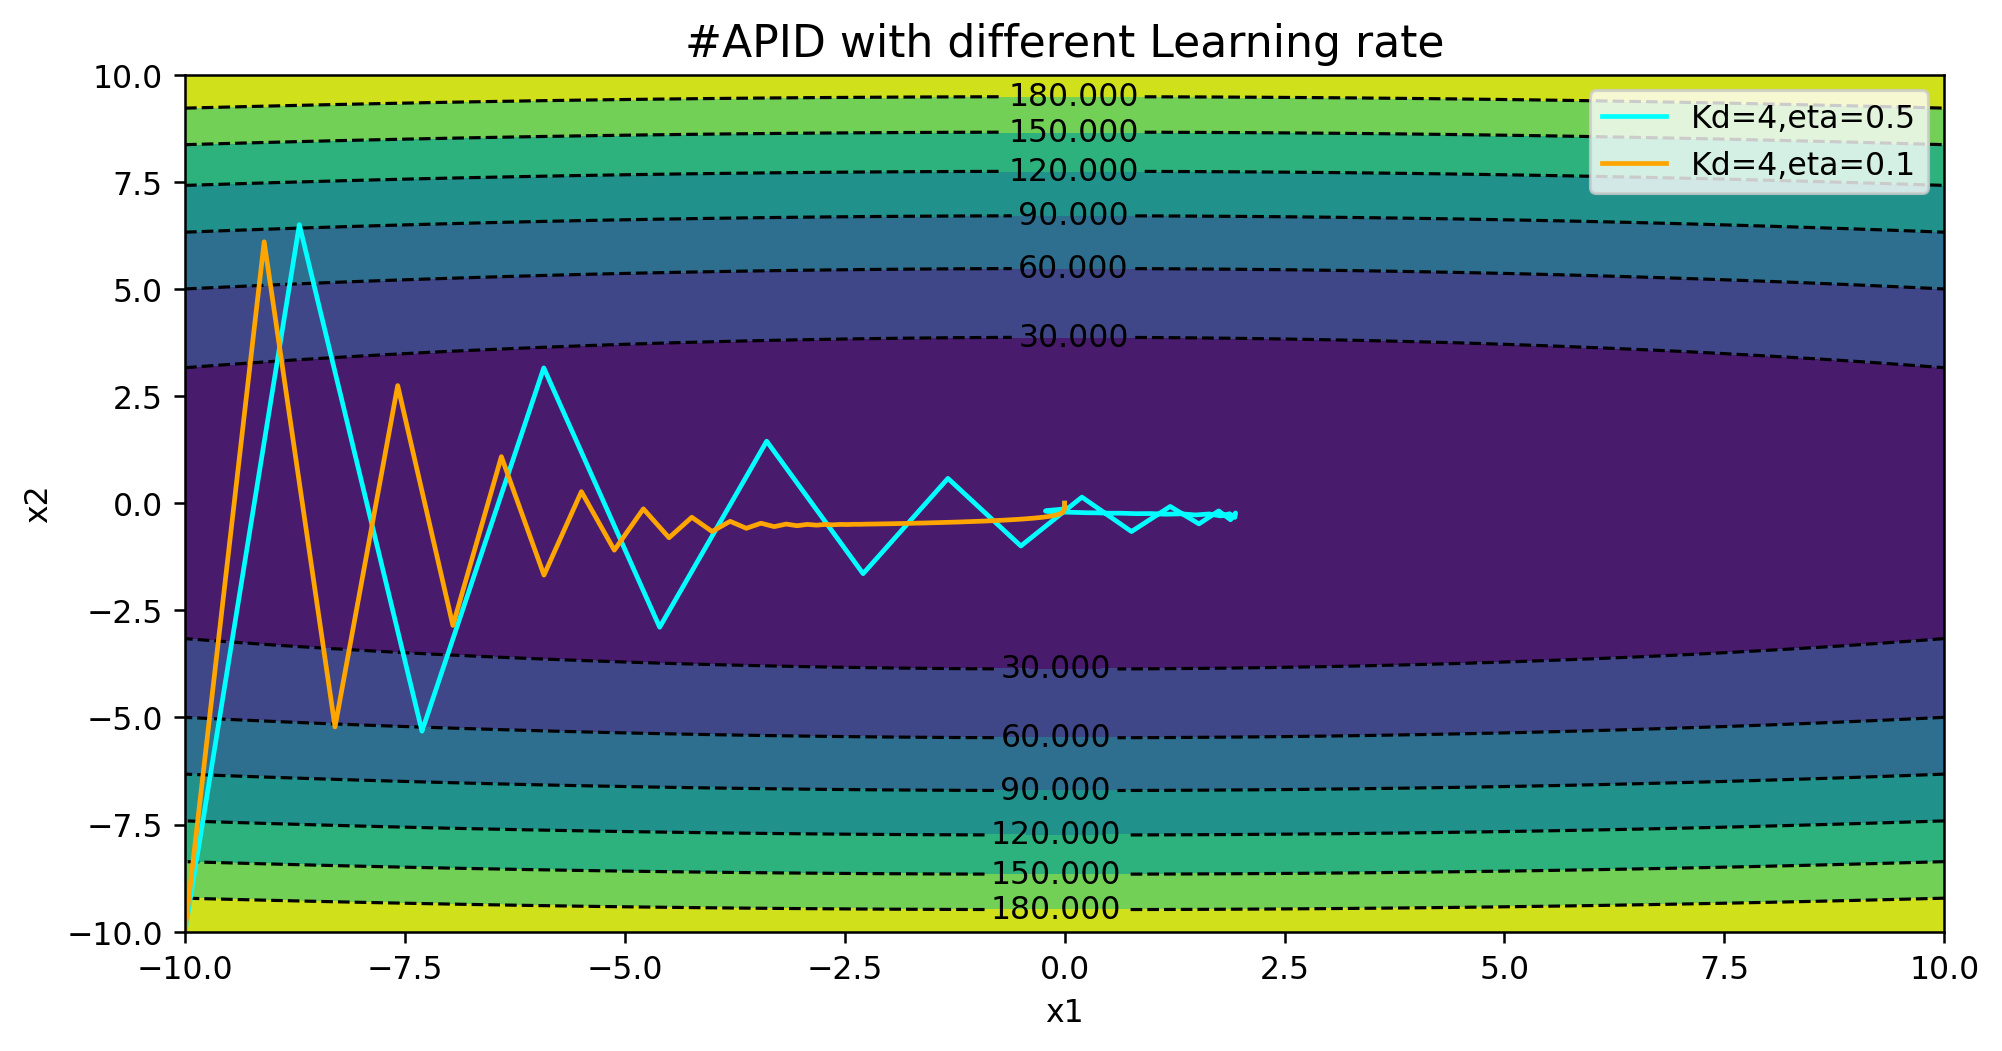

CPU times: user 908 ms, sys: 112 ms, total: 1.02 s
Wall time: 906 ms


In [89]:
%%time
x_val1 = [l[0] for l in log3]
y_val1 = [l[1] for l in log3]

x_val2 = [l[0] for l in log4]
y_val2 = [l[1] for l in log4]



plt.figure(figsize=(10,5))

cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )

plt.rcParams['figure.dpi'] = 227

plt.title('#APID with different Learning rate', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='Kd=4,eta=0.5',color='cyan')
plt.plot(x_val2,y_val2, label = 'Kd=4,eta=0.1', color='orange')

plt.legend()

plt.show()

In [90]:
%%time
x1, x2, log3,t = Adaptive_PID_Ada(lr=1, Kd=1) 


CPU times: user 29.9 ms, sys: 0 ns, total: 29.9 ms
Wall time: 30.3 ms


In [91]:
t

11643

In [92]:
%%time
x1, x2, log4,t = Adaptive_PID_Ada(lr=0.5, Kd=1) 


CPU times: user 28.3 ms, sys: 16 µs, total: 28.3 ms
Wall time: 49.5 ms


In [93]:
t

11586

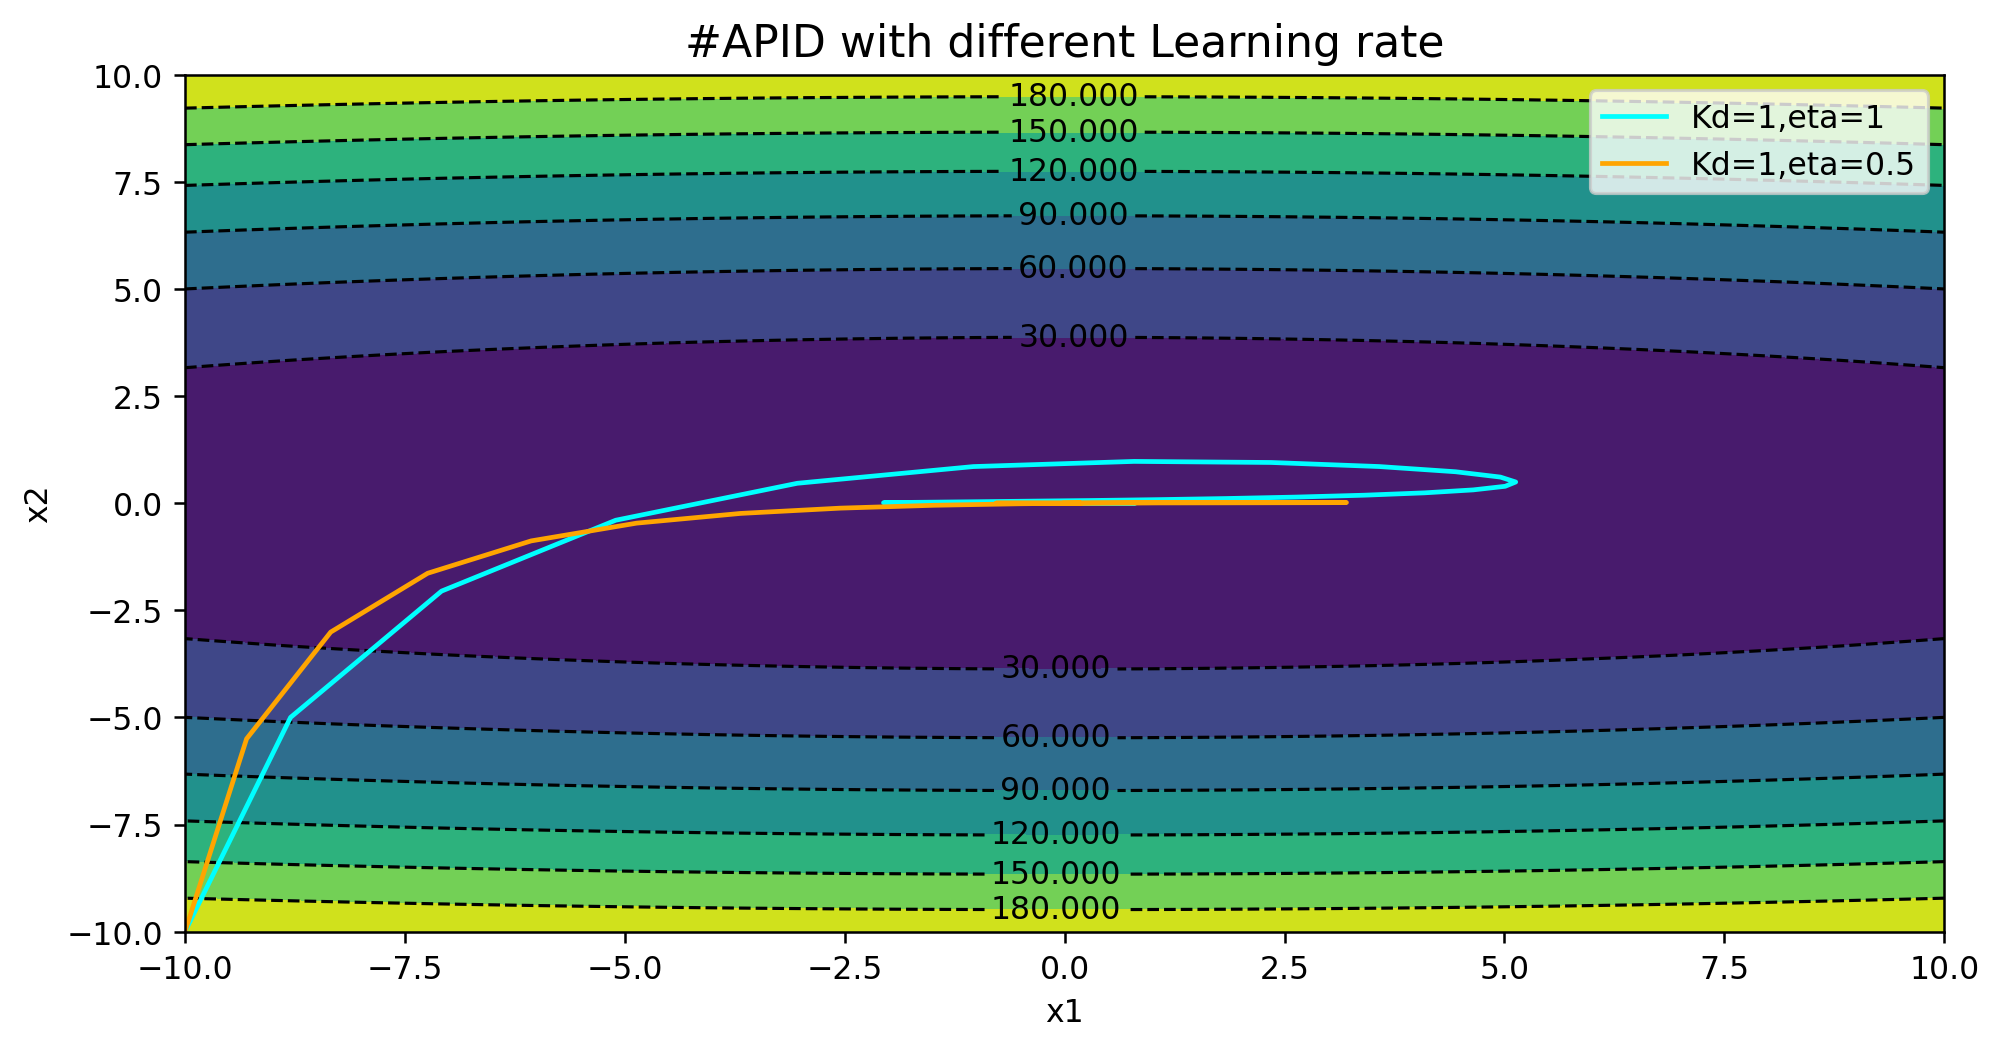

CPU times: user 631 ms, sys: 81.7 ms, total: 713 ms
Wall time: 634 ms


In [94]:
%%time
x_val1 = [l[0] for l in log3]
y_val1 = [l[1] for l in log3]

x_val2 = [l[0] for l in log4]
y_val2 = [l[1] for l in log4]



plt.figure(figsize=(10,5))

cp = plt.contour(X1, X2, Y, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X1, X2, Y, )

plt.rcParams['figure.dpi'] = 227

plt.title('#APID with different Learning rate', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_val1,y_val1, label='Kd=1,eta=1',color='cyan')
plt.plot(x_val2,y_val2, label = 'Kd=1,eta=0.5', color='orange')

plt.legend()

plt.show()